<h1> Assignment 1 - Task 1 Solution </h1>

Student name: Ngo Vu Anh </br>
UOW ID: 7673541   </br>
Tutorial Group: T02   

<h2> 1. Import the data set </h2>

In [280]:
import pandas as pd
import csv
import numpy as np

test_file = 'customer_churn_dataset-testing-master.csv'
train_file = 'customer_churn_dataset-training-master.csv'

test_df = pd.read_csv(test_file)
train_df = pd.read_csv(train_file)

<h3> Describe the 2 data set imported </h3>

In [281]:
test_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [282]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<h2> 2. Find missing value </h2>

<h3> Test for missing value in testing data frame </h3>

In [283]:
test_missing = test_df.isnull().any() 
test_missing


CustomerID           False
Age                  False
Gender               False
Tenure               False
Usage Frequency      False
Support Calls        False
Payment Delay        False
Subscription Type    False
Contract Length      False
Total Spend          False
Last Interaction     False
Churn                False
dtype: bool

<h3> Test for missing value in training data frame </h3>

In [284]:
train_missing = train_df.isnull().any() 
train_missing

CustomerID           True
Age                  True
Gender               True
Tenure               True
Usage Frequency      True
Support Calls        True
Payment Delay        True
Subscription Type    True
Contract Length      True
Total Spend          True
Last Interaction     True
Churn                True
dtype: bool

<h3> Find where the missing value is </h3> 

In [285]:
train_missing = train_df.isnull().any() 
train_missing = train_df[train_df.isnull().any(axis=1)]

print('Check missing value train set')

train_missing

Check missing value train set


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Handle the mssing value </h3>

- The whole row is missing value 
- This is the only row with null value
- It is less than 5% of the entire data frame 

-> Hence, we can remove this entire instance


In [286]:
train_df = train_df.dropna()

train_missing = train_df.isnull().any() 
train_missing


CustomerID           False
Age                  False
Gender               False
Tenure               False
Usage Frequency      False
Support Calls        False
Payment Delay        False
Subscription Type    False
Contract Length      False
Total Spend          False
Last Interaction     False
Churn                False
dtype: bool

After dropping the row with missing values, we will not see any missing value in our training data frame

In [287]:
test_df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


<h2> 3. Using Z-Score normalization </h2>
For column Last Interaction

In [288]:
normalized_last_interaction = (train_df['Last Interaction'] - train_df['Last Interaction'].mean()) / train_df['Last Interaction'].std()

normalized_last_interaction


0         0.293052
1        -0.986582
2        -1.335574
3         1.689016
4         0.642043
            ...   
440828   -0.753922
440829   -1.451904
440830   -0.637591
440831   -1.451904
440832    0.758373
Name: Last Interaction, Length: 440832, dtype: float64

In [289]:
normalized_last_interaction_test = (test_df['Last Interaction'] - test_df['Last Interaction'].mean()) / test_df['Last Interaction'].std()

normalized_last_interaction_test

0       -0.752318
1        0.521061
2        0.636822
3        0.289537
4        0.289537
           ...   
64369   -0.173509
64370   -0.752318
64371    0.521061
64372   -0.289271
64373    0.752584
Name: Last Interaction, Length: 64374, dtype: float64

<h3> Show mean and variance of the calculated value </h3>

Mean

In [290]:
print("For train set")
normalized_last_interaction.mean()

For train set


1.0367239393712263e-16

In [291]:
print("For test set")
normalized_last_interaction_test.mean()

For test set


3.3996203842251666e-17

Variance

In [292]:
print("For train set")
normalized_last_interaction.var()

For train set


1.0000000000005635

In [293]:
print("For test set")
normalized_last_interaction_test.var()

For test set


0.9999999999995506

In [294]:
# Append to train set and test set 
train_df['Normalized Last Interaction'] = normalized_last_interaction
test_df['Normalized Last Interaction'] = normalized_last_interaction_test

<h2> 4. Create 5 bins for the attribute Total Spend </h2> 

In [295]:


column_to_bin = 'Total Spend'

# Create 5 bins for the selected column
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5']
train_df['Total Spend Bin'] = pd.cut(train_df[column_to_bin], bins=5, labels=bin_labels)

# Display the DataFrame with the new bin column
train_df



,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Normalized Last Interaction,Total Spend Bin
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,0.293052,Bin 5
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,-0.986582,Bin 3
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,-1.335574,Bin 1
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,1.689016,Bin 2
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,0.642043,Bin 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,-0.753922,Bin 4
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,-1.451904,Bin 4
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,-0.637591,Bin 5
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,-1.451904,Bin 3


<h2> 5. Conduct one hot encoding </h2>

In [296]:
# For train set

column_encode = ['Contract Length']

encoded_contract_length = pd.get_dummies(train_df, columns = column_encode)

# Append to data frame 

to_add_train = ['Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']
train_df = pd.concat([train_df, encoded_contract_length[to_add_train]], axis=1)

train_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Normalized Last Interaction,Total Spend Bin,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,0.293052,Bin 5,1,0,0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,-0.986582,Bin 3,0,1,0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,-1.335574,Bin 1,0,0,1
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,1.689016,Bin 2,0,1,0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,0.642043,Bin 3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,-0.753922,Bin 4,1,0,0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,-1.451904,Bin 4,1,0,0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,-0.637591,Bin 5,0,0,1
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,-1.451904,Bin 3,0,0,1


In [297]:
# For test set

column_encode = ['Contract Length']

encoded_contract_length_test = pd.get_dummies(test_df, columns = column_encode)

# Append to data frame 

to_add_test = ['Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']
test_df = pd.concat([test_df, encoded_contract_length_test[to_add_test]], axis=1)

test_df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Normalized Last Interaction,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,-0.752318,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,0.521061,0,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,0.636822,1,0,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,0.289537,0,0,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,0.289537,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1,-0.173509,0,0,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1,-0.752318,1,0,0
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1,0.521061,0,1,0
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1,-0.289271,0,1,0


## 6. Suggest new feature 

Make new feature: 

support_per_usage_ratio = Support Calls / Usage Frequency

In [298]:
from sklearn.base import BaseEstimator, TransformerMixin

class SupportPerUsageRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Calculate the 'support_per_usage_ratio'
        X_transformed['support_per_usage_ratio'] = X_transformed['Usage Frequency'] / X_transformed['Support Calls']

        return X_transformed


In [299]:
import pandas as pd

# Initialize the custom transformer
transformer = SupportPerUsageRatioTransformer()

# Apply the transformer to add the new feature to the DataFrame
train_df = transformer.transform(train_df)
test_df = transformer.transform(test_df)

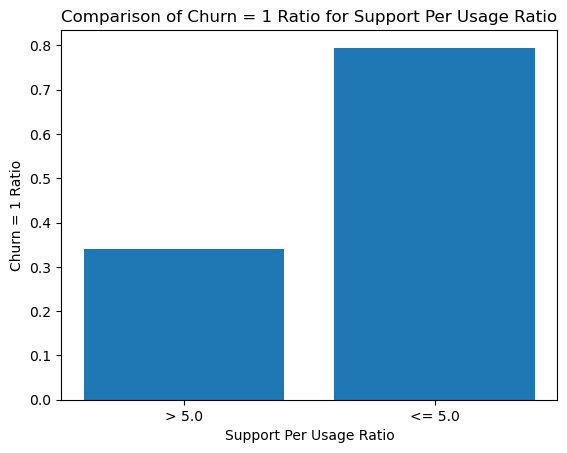

In [300]:
# Visualize why I choose this attribute

import matplotlib.pyplot as plt

train_df = pd.DataFrame(train_df)

# Filter the DataFrame for instances where 'support_per_usage_ratio' is greater than 5.0
checkSupport_gt_5 = train_df[train_df['support_per_usage_ratio'] > 5.0]

# Count the number of occurrences where 'Churn' is equal to 1.0 for the filtered data
churnCount_gt_5 = checkSupport_gt_5[checkSupport_gt_5['Churn'] == 1.0].shape[0]

# Get the total count for values greater than 5.0
total_gt_5 = checkSupport_gt_5.shape[0]

# Calculate the ratio for values greater than 5.0
ratio_gt_5 = churnCount_gt_5 / total_gt_5

# Get the total count for values less than or equal to 5.0
total_lte_5 = train_df[train_df['support_per_usage_ratio'] <= 5.0].shape[0]

# Calculate the ratio for values less than or equal to 5.0
ratio_lte_5 = (train_df[train_df['support_per_usage_ratio'] <= 5.0]['Churn'] == 1.0).mean()

# Plot the comparison using a bar chart
plt.bar(['> 5.0', '<= 5.0'], [ratio_gt_5, ratio_lte_5])
plt.xlabel('Support Per Usage Ratio')
plt.ylabel('Churn = 1 Ratio')
plt.title('Comparison of Churn = 1 Ratio for Support Per Usage Ratio')
plt.show()


This is the reason why I created this attribute. By domain knowledge, I predict that the customer that contact customer support more frequently, have closer contact with the customer service will have higher chance to continue using, which the probability of Churn is lower. Based on the graph, we can also see that for customer that use more Support Calls,  the amount of Churn = 1 is significantly lower than the customer use less Support Calls